In [5]:
import nltk,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import nltk.data
import csv
from nltk.stem.porter import *
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import LabelEncoder
from numpy import array as arr
from numpy import argmax

In [6]:
arr=[]
file = open("downloaded1.csv",'rt')
samples=csv.reader(file)
c=0
for i in samples:
    c+=1
    
    if c==2:
        x=i[1]
        break

for i in samples:
    if i[1]!=x:
        arr.append(i)


df=pd.DataFrame(data=arr,columns=("types","posts"))
print(len(df.columns))
print(df)

2
         types                                              posts
0     negative  Iranian general says Israel's Iron Dome can't ...
1     positive  with J Davlar 11th. Main rivals are team Polan...
2     negative  Talking about ACT's &amp;&amp; SAT's, deciding...
3     negative  They may have a SuperBowl in Dallas, but Dalla...
4      neutral  Im bringing the monster load of candy tomorrow...
5      neutral  Apple software, retail chiefs out in overhaul:...
6     positive  @oluoch @victor_otti @kunjand I just watched i...
7      neutral  #Livewire Nadal confirmed for Mexican Open in ...
8     positive  @MsSheLahY I didnt want to just pop up... but ...
9      neutral  @Alyoup005 @addicted2haley hmmmm  November is ...
10     neutral  #Iran US delisting MKO from global terrorists ...
11    positive  Good Morning Becky ! Thursday is going to be F...
12     neutral  Expect light-moderate rains over E. Visayas; C...
13    positive  One ticket left for the @49ers game tomorrow! ...
14    ne

In [7]:
def labelencode(df):
    data=df['types']
    values=np.array(data)
    label=LabelEncoder()
    intencode=label.fit_transform(values)
    df['typeint']=intencode
    print(list(label.inverse_transform([0,1,2])))
    #df['typeint'].plot(kind='hist')
    #k=np.arange(0,16)
    #x=label.inverse_transform(k)   #can access encoded actual value using x
    #print(values)
    return df

df=labelencode(df)
#print(df)
shortdata=df.iloc[:,1]
#print(shortdata)

['negative', 'neutral', 'positive']


In [8]:
#removing stopwords 
from nltk.corpus import stopwords
stop=stopwords.words("english")
print('------Removing stopwords------')
shortdata=shortdata.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
#shortdata=shortdata.apply(lambda x: ' '.join([word for word in x.split() if word!='i' or word!='I']))
print(shortdata)
#stemming of words
ps = PorterStemmer()
print('-------Stemming--------')
shortdata = shortdata.apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))
print(shortdata)

------Removing stopwords------
0       Iranian general says Israel's Iron Dome can't ...
1       J Davlar 11th. Main rivals team Poland. Hopefu...
2       Talking ACT's &amp;&amp; SAT's, deciding I wan...
3       They may SuperBowl Dallas, Dallas ain't winnin...
4       Im bringing monster load candy tomorrow, I hop...
5       Apple software, retail chiefs overhaul: SAN FR...
6       @oluoch @victor_otti @kunjand I watched it! Sr...
7       #Livewire Nadal confirmed Mexican Open Februar...
8       @MsSheLahY I didnt want pop up... yep chapel h...
9       @Alyoup005 @addicted2haley hmmmm November odd ...
10      #Iran US delisting MKO global terrorists list ...
11      Good Morning Becky ! Thursday going Fantastic ...
12      Expect light-moderate rains E. Visayas; Cebu, ...
13      One ticket left @49ers game tomorrow! Don't mi...
14      AFC away fans Saturday. All stuff 'she said no...
15      Game 1 NLCS rematch NFC Championship game tomo...
16      Never start working dreams goals 

In [9]:
shortdata=shortdata.apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
#print(shortdata)
print('-------Lemmatization--------')
shortdata = shortdata.apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))
print(shortdata)

print('--------Removing punctuations--------')
def clear_punctuation(s):
	import string
	#print("\n")
	clear_string = ""
	for symbol in s:
		if symbol not in string.punctuation:
			clear_string += symbol
	return clear_string

shortdata = shortdata.apply(lambda x: ''.join(clear_punctuation(x))  )
print(shortdata)

-------Lemmatization--------
0       iranian gener say iron dome deal missil talk l...
1       J davlar main rival team hope make success end...
2       talk decid I want go appli colleg everyth coll...
3            they may superbowl dalla win not quarterback
4           Im bring monster load candi I hope get squich
5       appl retail chief san francisco appl inc ceo t...
6                           I watch U rememb sun morn nta
7        nadal confirm mexican open rafael nadal set play
8       I didnt want pop yep chapel hill next wednesda...
9       hmmmm novemb odd releas date true becom big en...
10      US delist mko global terrorist list line iran ...
11                    good morn becki thursday go fantast
12      expect rain samar leyt chanc rain expect fair ...
13      one ticket leave game miss rematch nfc champio...
14              afc away fan all stuff say when turn back
15      game nlc rematch nfc championship game gonna c...
16       never start work dream goal never 

In [10]:
def strip_all_entities(text):
	import string
	entity_prefixes = ['@']
	for separator in  string.punctuation:
		if separator not in entity_prefixes :
			text = text.replace(separator,' ')
	words = []
	for word in text.split():
		word = word.strip()
		if word:
			if word[0] not in entity_prefixes:
				words.append(word)
	return ' '.join(words)

shortdata = shortdata.apply(lambda x: ''.join(strip_all_entities(x))  ) 


In [11]:
i=0
arr=[]
print("-----PREPROCESSED_DATA------")
count=0
for line in shortdata:
    df.iloc[i,1]=line
    i=i+1
print(df)

-----PREPROCESSED_DATA------
         types                                              posts  typeint
0     negative  iranian gener say iron dome deal missil talk l...        0
1     positive  J davlar main rival team hope make success end...        2
2     negative  talk decid I want go appli colleg everyth coll...        0
3     negative       they may superbowl dalla win not quarterback        0
4      neutral      Im bring monster load candi I hope get squich        1
5      neutral  appl retail chief san francisco appl inc ceo t...        1
6     positive                      I watch U rememb sun morn nta        2
7      neutral   nadal confirm mexican open rafael nadal set play        1
8     positive  I didnt want pop yep chapel hill next wednesda...        2
9      neutral  hmmmm novemb odd releas date true becom big en...        1
10     neutral  US delist mko global terrorist list line iran ...        1
11    positive                good morn becki thursday go fantast      

In [12]:
proc_data=np.array(df['posts'])
label=np.array(df['typeint'])
print(len(proc_data))
print(len(label))

6936
6936


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(proc_data, label,
                                                    stratify=label, 
                                                    test_size=0.1)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
#print(y_test)

6242
694
6242
694


In [14]:
stoplist = set('for a of the and to in'.split(' '))
texts = [[word for word in document.lower().split() if word not in stoplist] for document in X_train]
#print(texts)
print(len(X_train))
print(X_train)

6242
['In ideal world oregon bois state win sept give power pac'
 'lmfao alright u get good job parker see jan If I get extra ticket game ur goin'
 'aye u guy like basketbal nba leagu pass free novemb find channel comcast direct TV'
 ... 'also perci jackson the book hero olympu entitl'
 'cant wait come dublin monday excit see'
 'head mcadori high speak footbal get boy readi straight boom brookwood tomorrow night']


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features=1000)
X_train_counts = count_vect.fit(X_train)
bowTrain = X_train_counts.transform(X_train)
bowTest = X_train_counts.transform(X_test)
print(bowTrain)
print(bowTest)

  (0, 350)	1
  (0, 430)	1
  (0, 682)	1
  (0, 772)	1
  (0, 822)	1
  (0, 967)	1
  (0, 983)	1
  (1, 289)	1
  (1, 344)	1
  (1, 346)	2
  (1, 357)	1
  (1, 359)	1
  (1, 423)	1
  (1, 451)	1
  (1, 463)	1
  (1, 646)	1
  (1, 765)	1
  (1, 871)	1
  (1, 921)	1
  (2, 155)	1
  (2, 242)	1
  (2, 311)	1
  (2, 331)	1
  (2, 375)	1
  (2, 500)	1
  :	:
  (6238, 344)	1
  (6238, 589)	1
  (6238, 733)	1
  (6238, 792)	1
  (6238, 820)	1
  (6239, 18)	1
  (6239, 109)	1
  (6239, 449)	1
  (6239, 857)	1
  (6240, 134)	1
  (6240, 178)	1
  (6240, 287)	1
  (6240, 572)	1
  (6240, 765)	1
  (6240, 939)	1
  (6241, 112)	1
  (6241, 322)	1
  (6241, 346)	1
  (6241, 394)	1
  (6241, 404)	1
  (6241, 608)	1
  (6241, 709)	1
  (6241, 807)	1
  (6241, 832)	1
  (6241, 882)	1
  (0, 217)	1
  (0, 262)	1
  (0, 314)	1
  (0, 434)	1
  (0, 550)	1
  (0, 634)	1
  (0, 768)	1
  (1, 22)	1
  (1, 551)	1
  (1, 882)	1
  (1, 985)	1
  (1, 992)	1
  (2, 210)	1
  (2, 217)	1
  (2, 482)	1
  (2, 541)	1
  (2, 554)	1
  (2, 587)	1
  (2, 724)	1
  (2, 898)	1
  (2, 911)	

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=20)
#print(train.shape,trainlabel.shape)
model.fit(bowTrain,y_train)
x=model.predict(bowTest)
print(model.score(bowTrain,y_train))


0.5893944248638257


In [21]:
count=0
for i in range(len(y_test)):
    if y_test[i]==x[i]:
        count=count+1
print('accuracy:',count/len(y_test)*100)
    

accuracy: 55.61959654178674


In [18]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(bowTrain, y_train)
    pred_i = knn.predict(bowTest)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

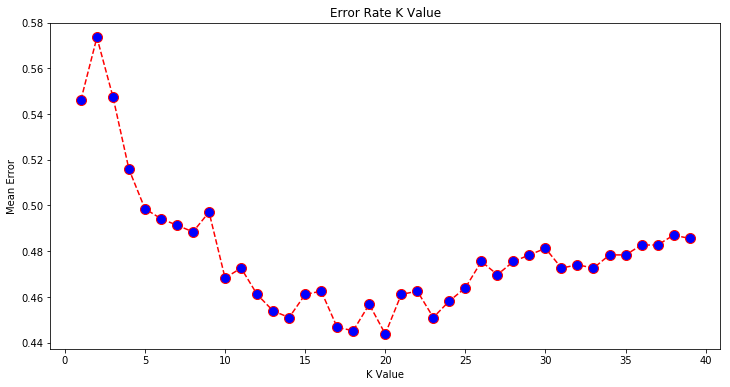

In [19]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  